In [4]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [32]:
pwd

'C:\\Users\\SIDDU'

In [33]:
df=pd.read_csv('HCLTECH.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)

Shape of data (2456, 14)


In [34]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
StockData = pd.read_csv('HCLTECH.csv')
StockData.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


<Axes: xlabel='Date'>

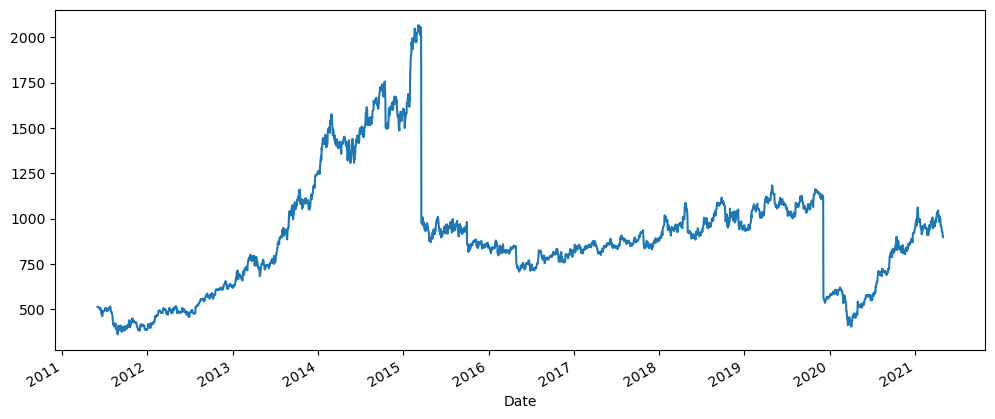

In [35]:
df['Close'].plot(figsize=(12,5))

In [36]:
#Data Cleaning
HCLTechStockData = StockData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)
  
HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

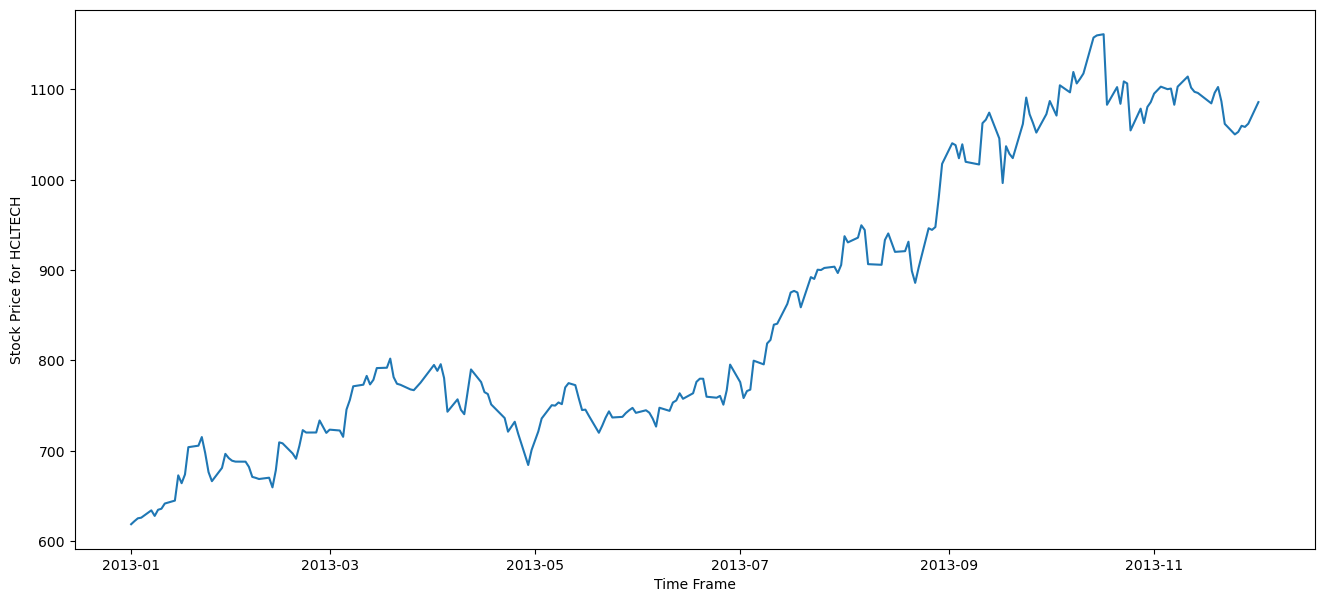

In [37]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

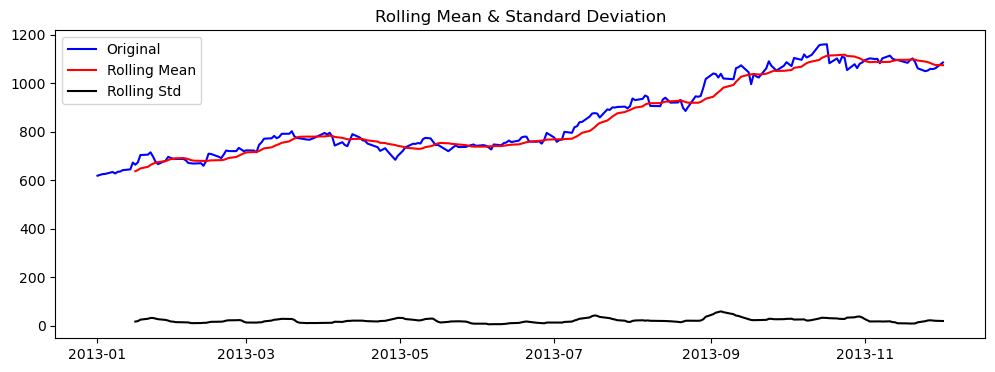

In [38]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(12,4))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [19]:
#making series stationary

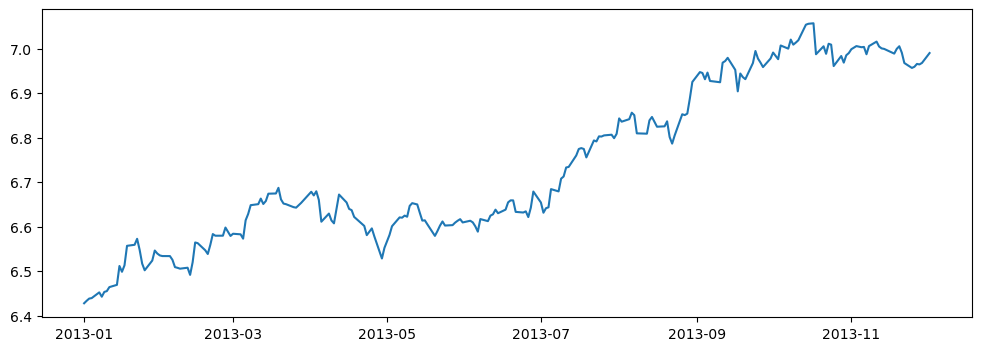

In [39]:
#Lets try transformation
plt.figure(figsize=(12,4))
fig = plt.figure(1)

# import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

<Figure size 640x480 with 0 Axes>

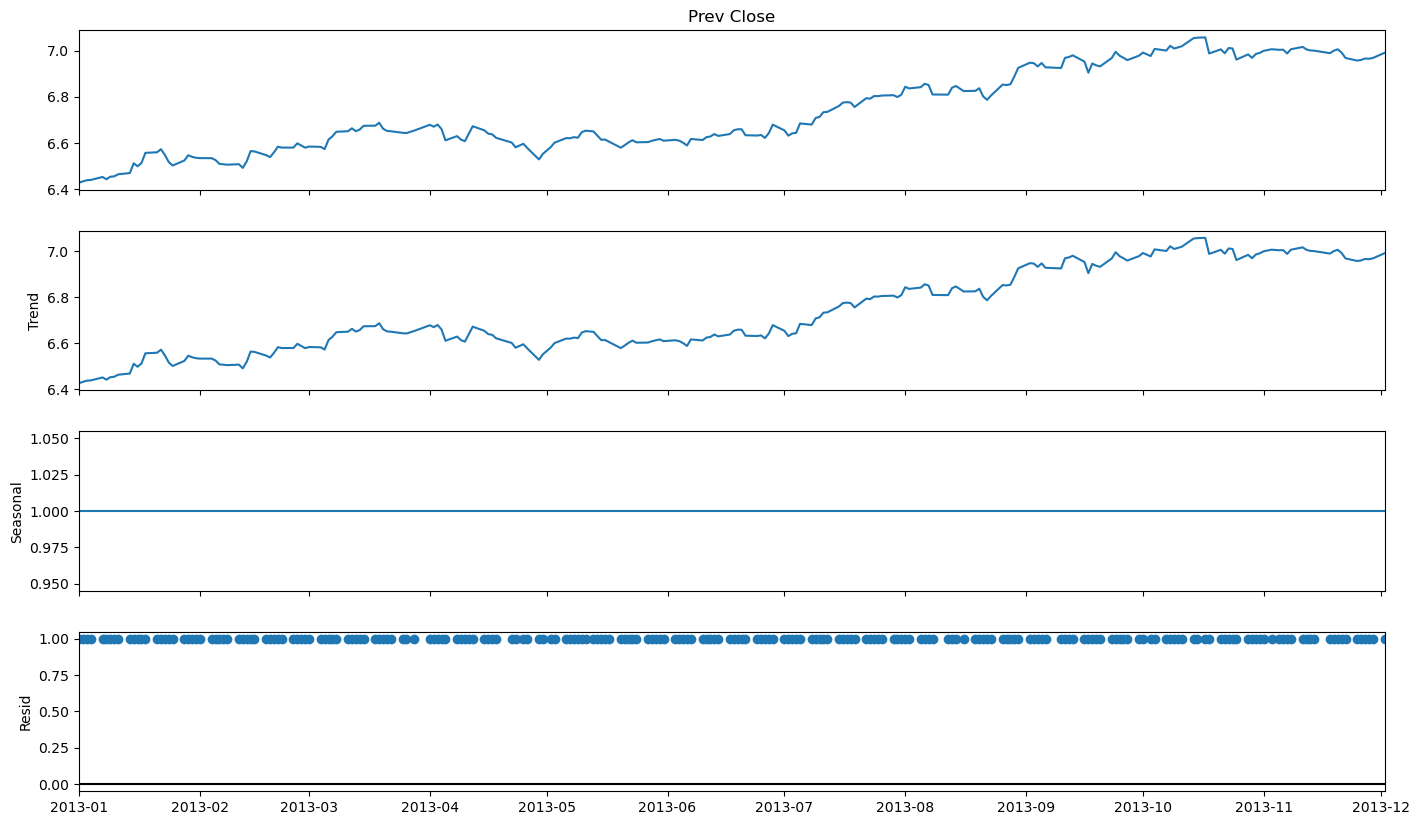

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts_log, model='multiplicative', period = 1)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [41]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Close'])

1. ADF :  -2.408428801893201
2. P-Value :  0.13937156039598125
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 2455
5. Critical Values :
	 1% :  -3.433016456478213
	 5% :  -2.8627180168175133
	 10% :  -2.567397105578623


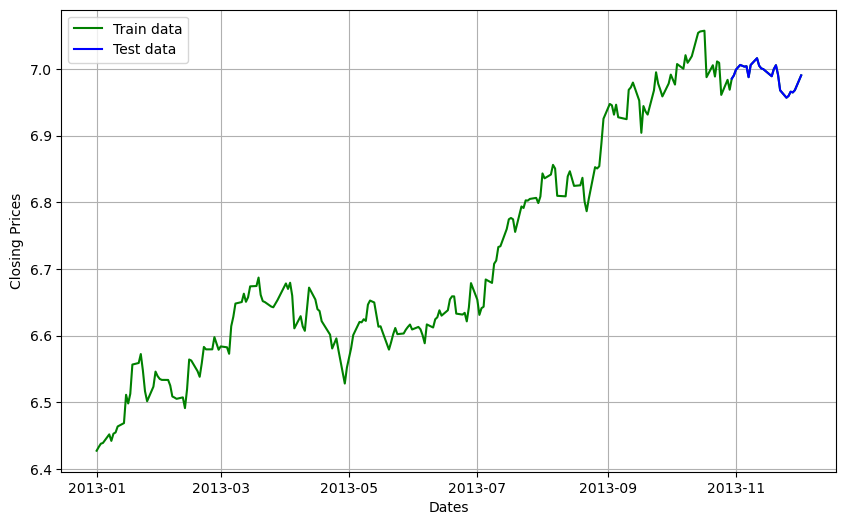

In [42]:
from pmdarima import auto_arima
train=df.iloc[:30]
test=df.iloc[:30]
train_data, test_data = ts_log[3:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(ts_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [43]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1017.727, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1015.738, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1015.741, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1016.141, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1013.761, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.895 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 510.863
Date:                Mon, 12 Aug 2024   AIC                          -1017.727
Time:                        23:00:34   BIC                          -1011.101
Sample:                             0   HQIC                         -1015.046
                                - 204                                  

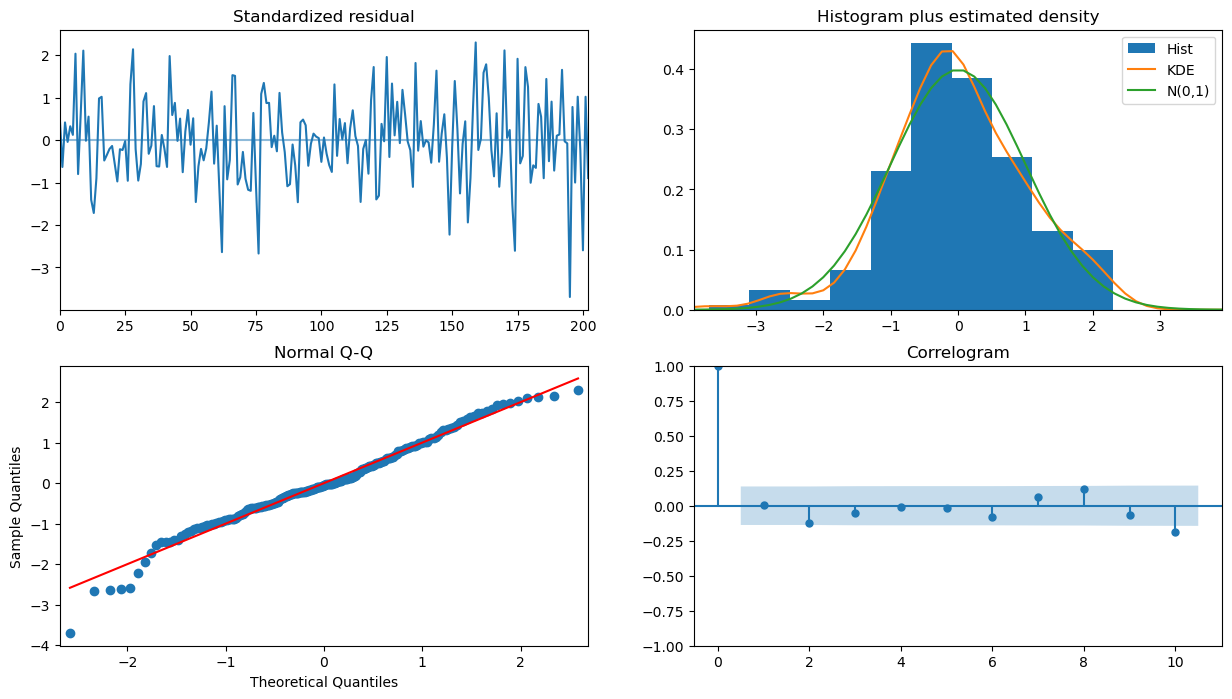

In [44]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [45]:
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit()
print(fitted.summary())

# newer version of statsmodels. disp
# import statsmodels.api as smapi
# model = smapi.tsa.arima.ARIMA(train_data, order=(3,1,2))
# result = model.fit()
# print(result.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Prev Close   No. Observations:                  204
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 512.409
Date:                Mon, 12 Aug 2024   AIC                          -1012.817
Time:                        23:00:58   BIC                           -992.938
Sample:                             0   HQIC                         -1004.775
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0259      0.087      0.297      0.767      -0.145       0.197
ar.L2          0.9239      0.046     19.993      0.000       0.833       1.014
ar.L3          0.0426      0.075      0.566      0.5

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


496.06166666666667

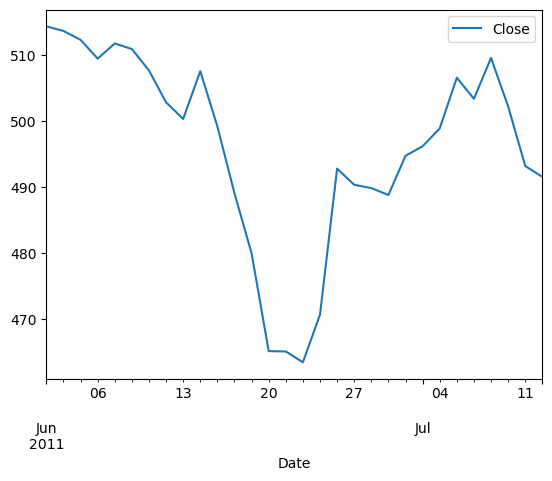

In [46]:
test['Close'].plot(legend=True)
test['Close'].mean()

In [47]:
model2=ARIMA(df[ "Close" ],order=(1,0,5))
model2=model2.fit()
df.tail()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,HCLTECH,EQ,955.65,940.0,954.50,923.05,930.0,928.80,931.70,19619972,1.827997e+15,311431.0,9218485.0,0.4699
2021-04-27,HCLTECH,EQ,928.80,931.0,938.55,923.40,930.3,928.85,928.06,6406825,5.945938e+14,180458.0,3233276.0,0.5047
2021-04-28,HCLTECH,EQ,928.85,931.2,935.85,921.75,925.9,923.80,926.63,6845677,6.343403e+14,228230.0,3890178.0,0.5683
2021-04-29,HCLTECH,EQ,923.80,929.7,929.70,907.10,910.3,909.55,914.34,8588734,7.852988e+14,363122.0,4041614.0,0.4706
2021-04-30,HCLTECH,EQ,909.55,905.0,915.00,895.40,900.1,898.95,904.98,10921664,9.883911e+14,465056.0,6189272.0,0.5667


In [48]:
index_future_dates=pd.date_range(start="2021-04-30", end="2021-05-30")
pred=model2.predict(start=len(df),end=len(df)+30,typ="levels").rename("Stock Predictions")
pred.index=index_future_dates
print(pred)

2021-04-30    898.410923
2021-05-01    898.742539
2021-05-02    898.918252
2021-05-03    898.699122
2021-05-04    898.581436
2021-05-05    898.573170
2021-05-06    898.564943
2021-05-07    898.556753
2021-05-08    898.548601
2021-05-09    898.540487
2021-05-10    898.532411
2021-05-11    898.524372
2021-05-12    898.516370
2021-05-13    898.508406
2021-05-14    898.500478
2021-05-15    898.492587
2021-05-16    898.484732
2021-05-17    898.476914
2021-05-18    898.469132
2021-05-19    898.461386
2021-05-20    898.453676
2021-05-21    898.446001
2021-05-22    898.438362
2021-05-23    898.430759
2021-05-24    898.423190
2021-05-25    898.415657
2021-05-26    898.408159
2021-05-27    898.400695
2021-05-28    898.393266
2021-05-29    898.385871
2021-05-30    898.378510
Freq: D, Name: Stock Predictions, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

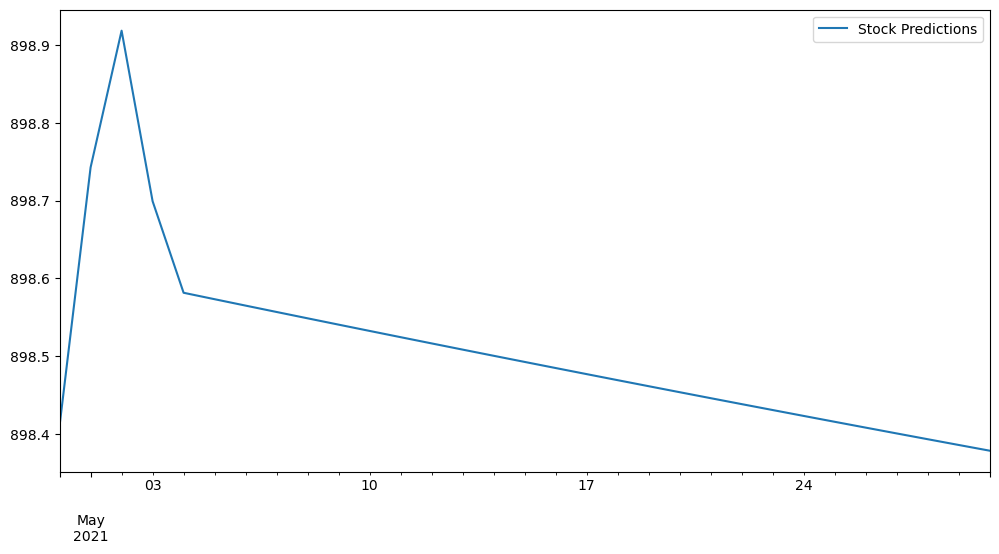

In [49]:
pred.plot(figsize=(12,6),legend=True)